In [1]:
# чтобы работал и python, и R
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("faraway")
library(faraway)

In [21]:
%%R
Sample <- read.table("var_9.csv",header = TRUE,sep =",")
Sample <- data.frame(Output=Sample$Output,Treatment=as.factor(Sample$Treatment))
head(Sample)

       Output Treatment
1  0.07359537         A
2 -0.14571850         A
3 -0.10028399         A
4  0.08227732         A
5  0.01246686         A
6 -0.02609943         A


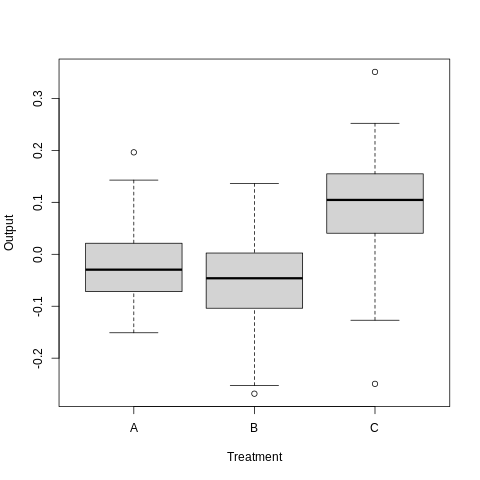

In [22]:
%%R
plot(Output~Treatment, data=Sample)

In [23]:
%%R
# оцениваем регрессионную модель
g <- lm(Output~Treatment, Sample)
summary(g)


Call:
lm(formula = Output ~ Treatment, data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33764 -0.04829 -0.00110  0.06008  0.26289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01701    0.01302  -1.307   0.1933    
TreatmentB  -0.04094    0.01841  -2.224   0.0277 *  
TreatmentC   0.10519    0.01841   5.714 5.93e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09204 on 147 degrees of freedom
Multiple R-squared:  0.3133,	Adjusted R-squared:  0.304 
F-statistic: 33.54 on 2 and 147 DF,  p-value: 1.003e-12



1) Сумма квадратов внутри групп:

In [24]:
%%R
(anovag_Sum_Sq_2 <- anova(g)$"Sum Sq"[2])

[1] 1.245361


2) Сумма квадратов между группами

In [25]:
%%R
(anovag_Sum_Sq_1 <- anova(g)$"Sum Sq"[1])

[1] 0.5682412


Внутригрупповая и межгрупповая дисперсии различы. Таким образом гипотеза о равенстве групповых средних скорее всего будет отвергнута.

In [26]:
%%R
(anovag_PValue<- anova(g)$"Pr(>F)"[1])

[1] 1.003147e-12


In [27]:
%%R
# оцениваем модель без константы
gi <- lm(Output~Treatment -1, Sample)
summary(gi)


Call:
lm(formula = Output ~ Treatment - 1, data = Sample)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33764 -0.04829 -0.00110  0.06008  0.26289 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
TreatmentA -0.01701    0.01302  -1.307    0.193    
TreatmentB -0.05795    0.01302  -4.452 1.67e-05 ***
TreatmentC  0.08818    0.01302   6.774 2.81e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09204 on 147 degrees of freedom
Multiple R-squared:  0.3144,	Adjusted R-squared:  0.3004 
F-statistic: 22.47 on 3 and 147 DF,  p-value: 4.931e-12



4) Сумма квадратов предиктора для теста модели H0:
 "all group mean values equal to zero"

In [28]:
%%R
(anovamgi_Sum_Sq_1 <- anova(gi)$"Sum Sq"[1])

[1] 0.5711524


5) Сумма квадратов остатков для теста модели H0:
 "all group mean values equal to zero"

In [29]:
%%R
(anovagi_Sum_Sq_2<- anova(gi)$"Sum Sq"[2])

[1] 1.245361


P-значение для проверки гипотезы о том, что все групповые средние равны нулю.

In [30]:
%%R
(anovagi_PValue <- anova(gi)$"Pr(>F)"[1])

[1] 4.931177e-12


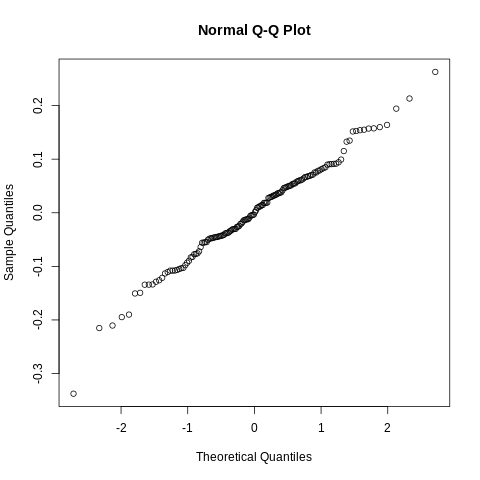

In [31]:
%%R
qqnorm(g$res)